<a href="https://colab.research.google.com/github/hugocfrias/hugocfrias-MVP/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP: Análise de Dados e Boas Práticas**

**Título:** Análise base de dados 'Mental Health Lifestyle'

**Nome:** Hugo Coelho de Frias

**Matrícula:** 4052025000248

Dataset: [Mental_Health_Lifestyle](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


Link DataBase GitHub Raw : https://raw.githubusercontent.com/hugocfrias/hugocfrias-MVP/refs/heads/main/Mental_Health_Lifestyle_Dataset.csv




# Descrição do Problema

O Conjunto de Dados de '**Mental Health and Lifestyle Habits Dataset (2019-2024)**' é uma coleção abrangente de dados que visa compreender como diversos fatores de estilo de vida afetam o bem-estar mental. Esta base de dados captura aspectos como rotinas de exercícios, hábitos alimentares, padrões de sono, níveis de estresse e interações sociais, além de informações demográficas.

O objetivo é identificar níveis de bem-estar de acordo com hábitos do cotidiano.


## Hipóteses do Problema

Hipóteses levantadas:

- Podemos segregar os diferentes níveis de bem-estar e de stress de acordo com as aferições de horas de sono, horas de trabalho e horas em telas diários?

- Existe alguma correlação entre os atributos numéricos (exemplo: horas de sonos e horas trabalhadas)?

- Há algum padrão facilmente de ser ifdentificado apenas com uma análise gráfica?

## Tipo de Problema

Identifiquei o problema como do tipo de **classificação supervisionada**. De acordo com os atributos númericos (horas de sono, horas trabalhadas, idade, socore de felididade etc), o objetivo é a previsão dos níveis de stress e  bem-estar mental dos indivíduos.

## Seleção de Dados

O dataset '**Mental Health Lifestyle**' foi coletado de acordo com as orientações do guia do MVP.

Fonte: https://www.kaggle.com/datasets.

## Atributos do Dataset

O dataset '**Mental Health Lifestyle**' possui 3000, de maneira balanceada em relação aos atributos categóricos (Países, Gêneros, Tipo de Dieta etc). No total, possui 12 atributos:

---
1. Country:	País do respondente (Australia, Brazil, Canada, Germany, India, Japan, USA)
2. Age: Idade do respondente (Anos)
3. Gender:	Identidade de gênero do respondente (Female, Male, Other)
4. Exercise Level: Nível de exercício físico do respondente (High, Low, Moderate)
5. Diet Type:	Classificação da dieta do respondente (Balanced, Junk Food, Keto, Vegan, Vegetarian)
6. Sleep Hours:	Horas de sono diária do respondente (Horas)
7. Stress Level: Nível de stress do respondente (High, Low, Moderate)
8. Mental Health Condition: Condição de saúde mental do respondente (Anxiety, Bipolar, Depression, None, PTSD)
9. Work Hours per Week: Horas de trabalho diária do respondente (Horas)
10. Screen Time per Day: Tempo de tela diária do respondente (Horas)
11. Social Interaction Score: Pontuação de interação Social do respondente (Escala 1-10)
12. Happiness Score: Pontuação de Felicidade do respondente (Escala 1-10)
---






# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados. Também demonstra o carregamento do dataset **'Mental Health Lifestyle'**.


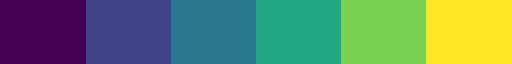

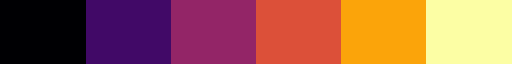

In [303]:
# Imports de Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Importação das Paletas de Cores
paleta1 = plt.get_cmap("viridis", 6)
paleta2 = plt.get_cmap("inferno", 6)

# exibição do mapa de cores
display(paleta1)
display(paleta2)

# importação dos dados uma url para um dataframe

url_dados = 'https://raw.githubusercontent.com/hugocfrias/hugocfrias-MVP/refs/heads/main/Mental_Health_Lifestyle_Dataset.csv'

# Carga do dataset através da url
Mental_Health_Lifestyle = pd.read_csv(url_dados)

In [92]:
# Verificando que 'Mental_Health_Lifestyle' é um dataframe
type(Mental_Health_Lifestyle)

pandas.core.frame.DataFrame

In [93]:
# Verificando os tipos de cada coluna do dataframe
Mental_Health_Lifestyle.dtypes

Country                         object
Age                              int64
Gender                          object
Exercise Level                  object
Diet Type                       object
Sleep Hours                    float64
Stress Level                    object
Mental Health Condition         object
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
dtype: object

In [94]:
# Exibição as primeiras linhas
Mental_Health_Lifestyle.head()

Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0     Brazil   48    Male            Low  Vegetarian          6.3   
1  Australia   31    Male       Moderate       Vegan          4.9   
2      Japan   37  Female            Low  Vegetarian          7.2   
3     Brazil   35    Male            Low       Vegan          7.2   
4    Germany   46    Male            Low    Balanced          7.3   

  Stress Level Mental Health Condition  Work Hours per Week  \
0          Low                     NaN                   21   
1          Low                    PTSD                   48   
2         High                     NaN                   43   
3          Low              Depression                   43   
4          Low                 Anxiety                   35   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
0                          4.0                       7.8              6.5  
1                          5.2                       8.2              6.8  
2                          4.7                       9.6              9.7  
3                          2.2                       8.2              6.6  
4                          3.6                       4.7              4.4

In [95]:
# Reordenação das colunas com o objetivo de iniciar o df com os atributos categóricos
new_order = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition', 'Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score' ]
df = Mental_Health_Lifestyle[new_order]

In [96]:
# Exibição as primeiras linhas do df reordenado
df.head()

Country  Gender Exercise Level   Diet Type Stress Level  \
0     Brazil    Male            Low  Vegetarian          Low   
1  Australia    Male       Moderate       Vegan          Low   
2      Japan  Female            Low  Vegetarian         High   
3     Brazil    Male            Low       Vegan          Low   
4    Germany    Male            Low    Balanced          Low   

  Mental Health Condition  Age  Sleep Hours  Work Hours per Week  \
0                     NaN   48          6.3                   21   
1                    PTSD   31          4.9                   48   
2                     NaN   37          7.2                   43   
3              Depression   35          7.2                   43   
4                 Anxiety   46          7.3                   35   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
0                          4.0                       7.8              6.5  
1                          5.2                       8.2              6.8  
2                          4.7                       9.6              9.7  
3                          2.2                       8.2              6.6  
4                          3.6                       4.7              4.4

### *Comentários Importações e Carga de Dados*

Após o carregamento dos dados diretamente do link do GitHub (Raw), os testes realizados demonstram que a carga foi realizada com sucesso. Dos 12 atributos, 6 são do tipo 'object', 2 são do tipo 'int' e 4 são do tipo 'float'. Realizei também uma reordenação das colunas com objetivo de iniciar o dataframe com os atributos categóricos.

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória, visamos entender a distribuição, as relações e as características das variáveis do dataset 'sleep_cycle'.

## Total e Tipo das Instâncias

Trata-se de um dataset com 3000 instâncias (observações) e 12 atributos. Estes 12 atributos (características) de medição são de tipo numérico (float), inteiros (int) e categóricos (object).

In [304]:
#Resumo para primeira análise dos dados importados
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 3000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Gender                       3000 non-null   object 
 2   Exercise Level               3000 non-null   object 
 3   Diet Type                    3000 non-null   object 
 4   Stress Level                 3000 non-null   object 
 5   Mental Health Condition      2405 non-null   object 
 6   Age                          3000 non-null   int64  
 7   Sleep Hours                  3000 non-null   float64
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2

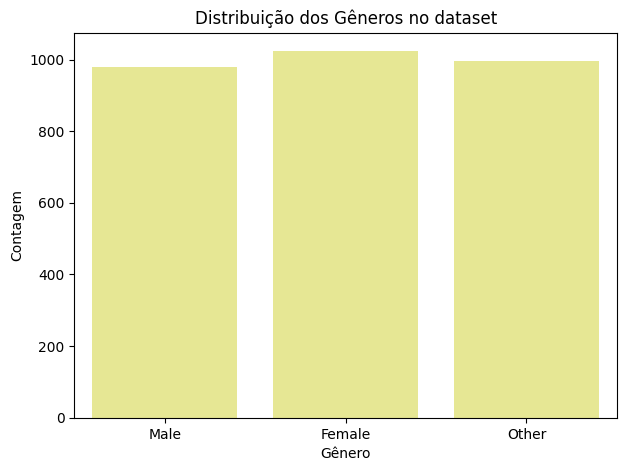

In [341]:
#Exemplo 1 de balenceamento das variáveis categóricas (Gênero).
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Gender', data=df, color='#f3f586')
plt.title('Distribuição dos Gêneros no dataset')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

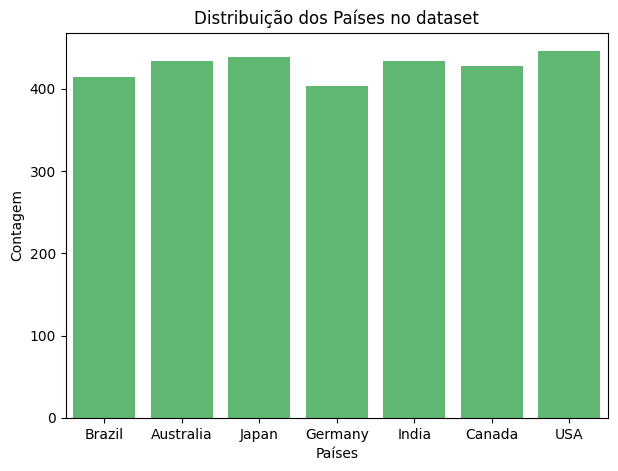

In [344]:
#Exemplo 2 de balenceamento das variáveis categóricas (Países).
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Country', data=df, color='#52c569')
plt.title('Distribuição dos Países no dataset')
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.show()

*Comentários Total e Tipo de Instâncias:*

Os gráficos de barras acima mostram que o dataset é balanceado em relação às classes 'Gênero' e 'Países'. Esse balanceamento é essesencial para que um modelo contruido a partir desses dados não desfavoreça algum tipo dessas classes.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [307]:
# Estatísticas descritivas básicas do dataset
df.describe()

Age  Sleep Hours  Work Hours per Week  \
count  3000.000000  3000.000000          3000.000000   
mean     41.229667     6.475933            39.466333   
std      13.428416     1.499866            11.451459   
min      18.000000     1.400000            20.000000   
25%      30.000000     5.500000            30.000000   
50%      41.000000     6.500000            39.000000   
75%      53.000000     7.500000            50.000000   
max      64.000000    11.300000            59.000000   

       Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
count                  3000.000000               3000.000000      3000.000000  
mean                      5.089833                  5.470200         5.395067  
std                       1.747231                  2.563532         2.557601  
min                       2.000000                  1.000000         1.000000  
25%                       3.600000                  3.300000         3.200000  
50%                       5.100000                  5.500000         5.400000  
75%                       6.600000                  7.600000         7.500000  
max                       8.000000                 10.000000        10.000000

### Média e Desvio Padrão

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [308]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

Age                            41.229667
Sleep Hours                     6.475933
Work Hours per Week            39.466333
Screen Time per Day (Hours)     5.089833
Social Interaction Score        5.470200
Happiness Score                 5.395067
Name: mean, dtype: float64

In [309]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

Age                            13.428416
Sleep Hours                     1.499866
Work Hours per Week            11.451459
Screen Time per Day (Hours)     1.747231
Social Interaction Score        2.563532
Happiness Score                 2.557601
Name: std, dtype: float64

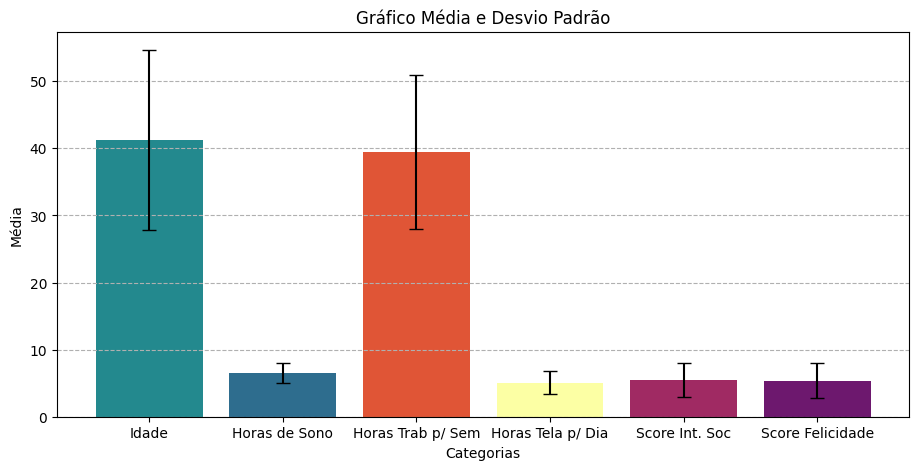

In [338]:
# Criação das variáveis para a construção do gráfico de barra da Média e do Desvio Padrão
categorias = ["Idade", "Horas de Sono","Horas Trab p/ Sem","Horas Tela p/ Dia","Score Int. Soc","Score Felicidade"]
meanchart = [df['Age'].mean(),df['Sleep Hours'].mean(),df['Work Hours per Week'].mean(),df['Screen Time per Day (Hours)'].mean(),df['Social Interaction Score'].mean(),df['Happiness Score'].mean()]
stdchart = [df['Age'].std(),df['Sleep Hours'].std(),df['Work Hours per Week'].std(),df['Screen Time per Day (Hours)'].std(),df['Social Interaction Score'].std(),df['Happiness Score'].std()]

# Criação do gráfico de barras
plt.figure(figsize=(11, 5))
plt.bar(categorias, meanchart, yerr=stdchart, capsize=5, color=['#23898e','#2e6d8e','#e05536','#fcffa4','#a02a63','#6d186e'], label='Valores com Erro')

# Adicionando títulos e rótulos
plt.xlabel('Categorias')
plt.ylabel('Média')
plt.title('Gráfico Média e Desvio Padrão')
plt.grid(axis='y', linestyle='--')
plt.show()

*Comentários Estatística Descritiva:*

* Primeiramente, foi apresentado um quadro de informações básicas (média, desvio padrão, precentis etc) em relação aos atributos númericos;

* Foi criado um  'gráfico de barras com barras de erro' que inclui as médias e os desvios dos atributos númericos. Podemos visualizar a proporção do desvio em relação à média de cada um destes atributos númericos. Proporcionalmente às médias, considero que os desvios são altos para todos os atributos.



## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

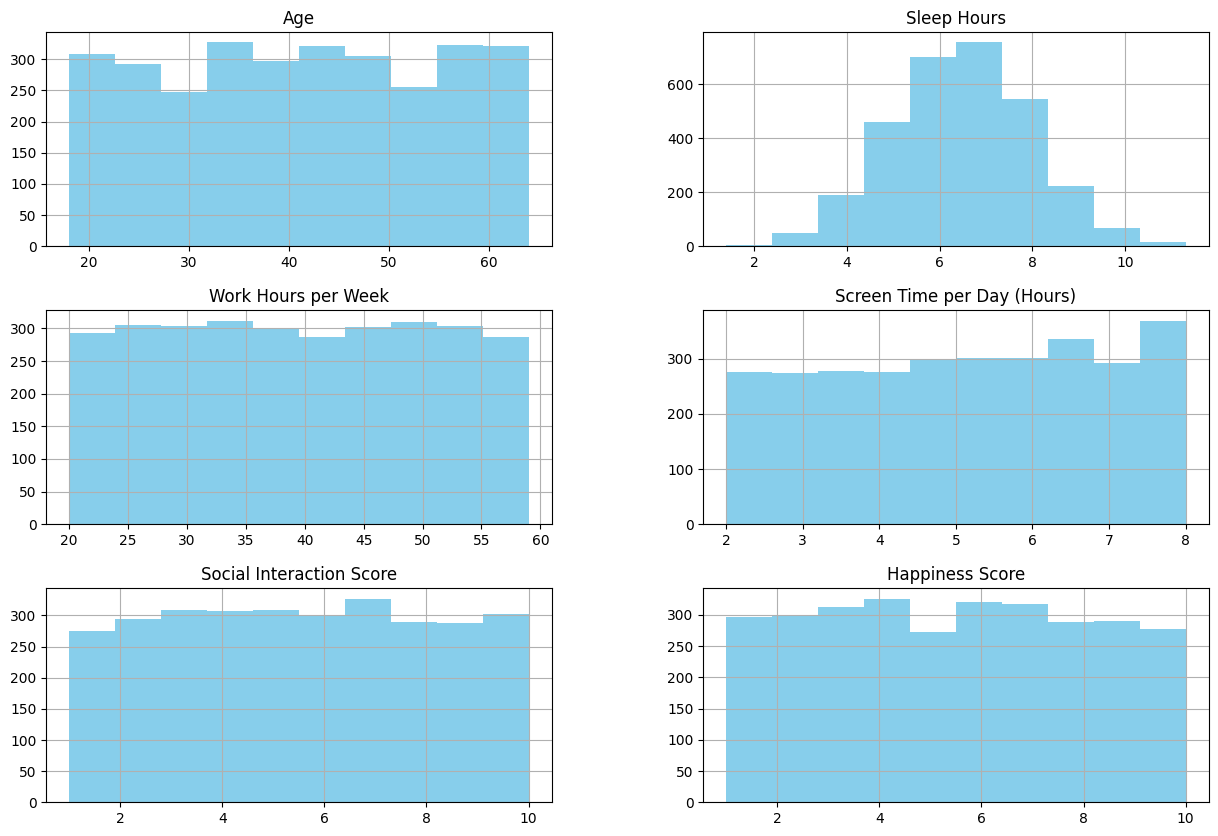

In [350]:
# Histogramas Variáveis Categóricas
df.hist(figsize = (15,10),color='skyblue',grid=1)
plt.show()

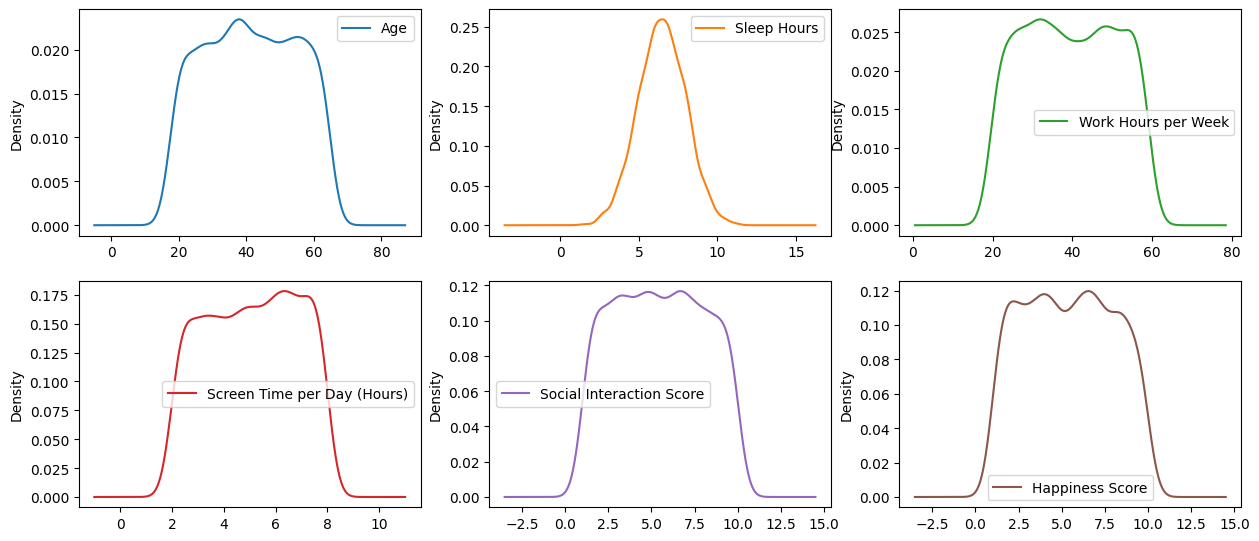

In [312]:
# Densidade Variáveis Categóricas
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

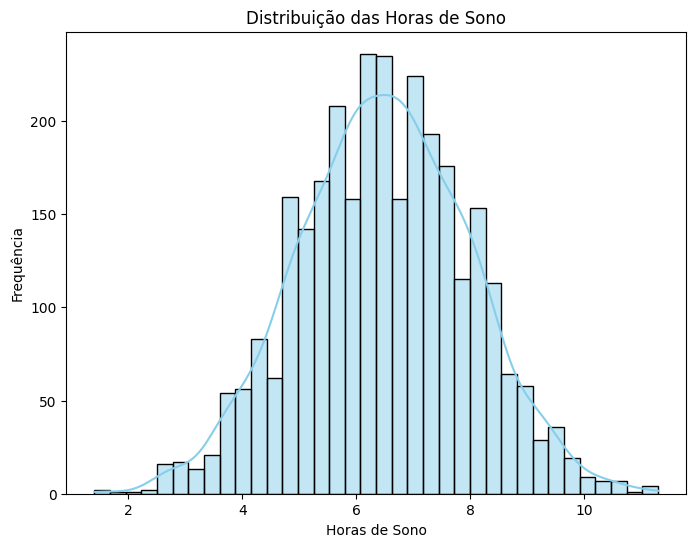

In [352]:
# Histograma Horas de Sono (Estimativa de Densidade de Kernel)
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Hours'], color='skyblue', kde=True)
plt.title('Distribuição das Horas de Sono')
plt.xlabel('Horas de Sono')
plt.ylabel('Frequência')
plt.show()

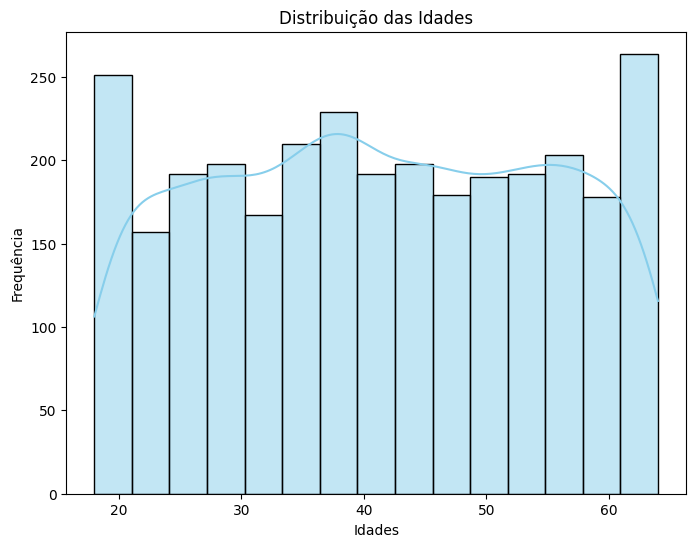

In [353]:
# Histograma Idades (Estimativa de Densidade de Kernel)
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], color='skyblue',kde=True)
plt.title('Distribuição das Idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.show()

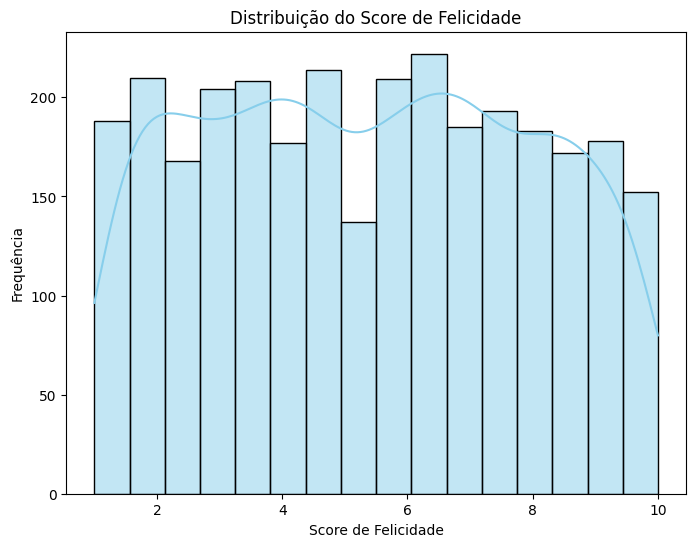

In [354]:
# Histograma Score Felicidade (Estimativa de Densidade de Kernel)
plt.figure(figsize=(8, 6))
sns.histplot(df['Happiness Score'], color='skyblue',kde=True)
plt.title('Distribuição do Score de Felicidade')
plt.xlabel('Score de Felicidade')
plt.ylabel('Frequência')
plt.show()

*Comentários Histogramas:*

* Primeiramente, foram apresentados de maneira isolada os histogramas e as densidades de cada variável categórica;

* Posteriormente, foram criados histogramas para os atributos 'Horas de Sono', 'Idades' e 'Score Felicidade' incluindo a 'Estimativa de Densidade de Kernel;

* Dentre todas, podemos observar que apenas o atributo 'Horas de Sono' tem um comportamento de distribuição normal.



## Boxplot

Para entender as diferenças entre os atributos categóricos, devemos olhar como se comportam os valores quando agrupados. Isso nos permite comparar a média, mediana e desvio padrão.

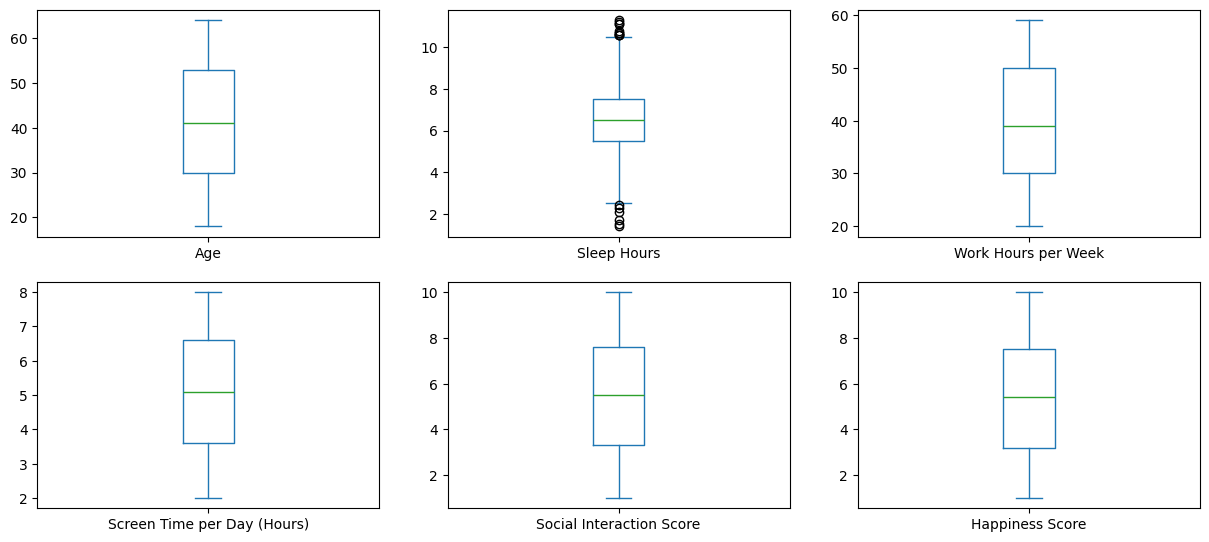

In [316]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### *Países*


In [317]:
# Estatísticas descritivas agrupadas Países
df.groupby('Country').describe()

Age                                                      \
           count       mean        std   min   25%   50%   75%   max   
Country                                                                
Australia  434.0  42.182028  13.586318  18.0  31.0  42.5  54.0  64.0   
Brazil     415.0  41.009639  13.164324  18.0  30.0  41.0  52.0  64.0   
Canada     428.0  40.387850  13.485669  18.0  29.0  41.0  52.0  64.0   
Germany    404.0  40.928218  13.386683  18.0  29.0  41.0  52.0  64.0   
India      434.0  40.794931  13.569320  18.0  29.0  39.0  53.0  64.0   
Japan      439.0  41.936219  13.738276  18.0  30.0  42.0  54.0  64.0   
USA        446.0  41.316143  13.050156  18.0  32.0  41.0  52.0  64.0   

          Sleep Hours            ... Social Interaction Score        \
                count      mean  ...                      75%   max   
Country                          ...                                  
Australia       434.0  6.411982  ...                      7.4   9.8   
Brazil          415.0  6.446024  ...                      7.8  10.0   
Canada          428.0  6.555607  ...                      7.9  10.0   
Germany         404.0  6.285644  ...                      7.7  10.0   
India           434.0  6.540783  ...                      7.4  10.0   
Japan           439.0  6.552164  ...                      7.8  10.0   
USA             446.0  6.523767  ...                      7.5  10.0   

          Happiness Score                                                     
                    count      mean       std  min    25%   50%    75%   max  
Country                                                                       
Australia           434.0  5.494240  2.591332  1.0  3.225  5.60  7.600  10.0  
Brazil              415.0  5.335904  2.598845  1.0  3.100  5.10  7.550  10.0  
Canada              428.0  5.559112  2.535516  1.0  3.375  5.85  7.600  10.0  
Germany             404.0  5.368069  2.411880  1.0  3.400  5.35  7.325   9.9  
India               434.0  5.378802  2.623779  1.1  3.000  5.30  7.600  10.0  
Japan               439.0  5.279271  2.529543  1.0  3.100  5.20  7.400  10.0  
USA                 446.0  5.350448  2.603530  1.0  3.100  5.40  7.500   9.9  

[7 rows x 48 columns]

Horas de Sono por País

---



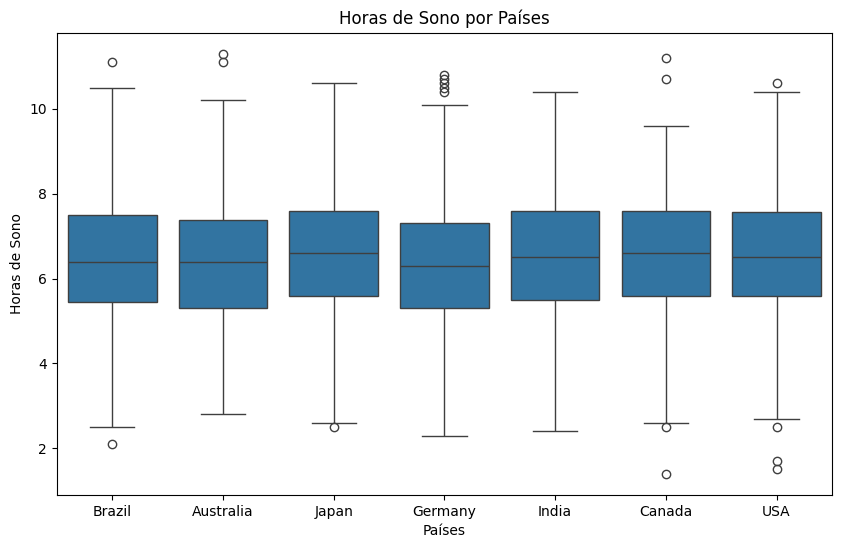

In [318]:
# Boxplot Horas de Sono por Países
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Sleep Hours', data=df)
plt.title('Horas de Sono por Países')
plt.xlabel('Países')
plt.ylabel('Horas de Sono')
plt.show()

Idade por País

---



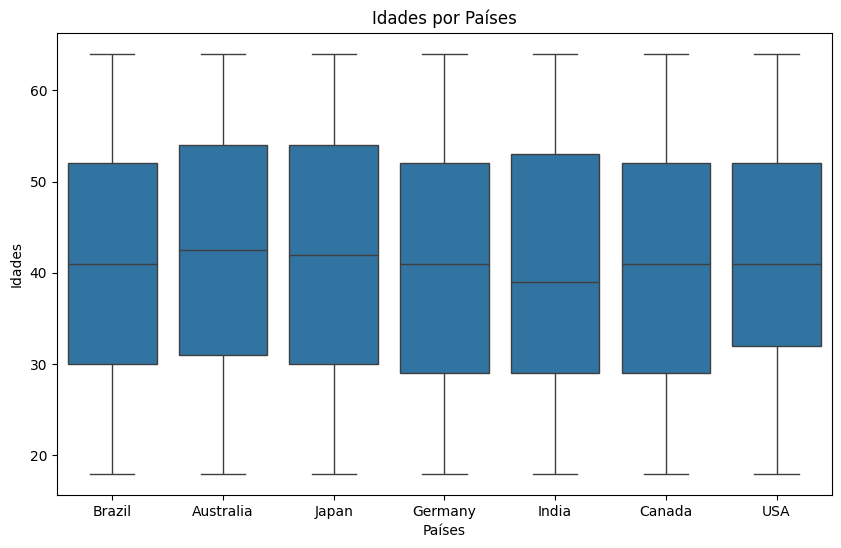

In [319]:
# Boxplot Idades por Países
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Age', data=df)
plt.title('Idades por Países')
plt.xlabel('Países')
plt.ylabel('Idades')
plt.show()

Score de Felicidade por País

---



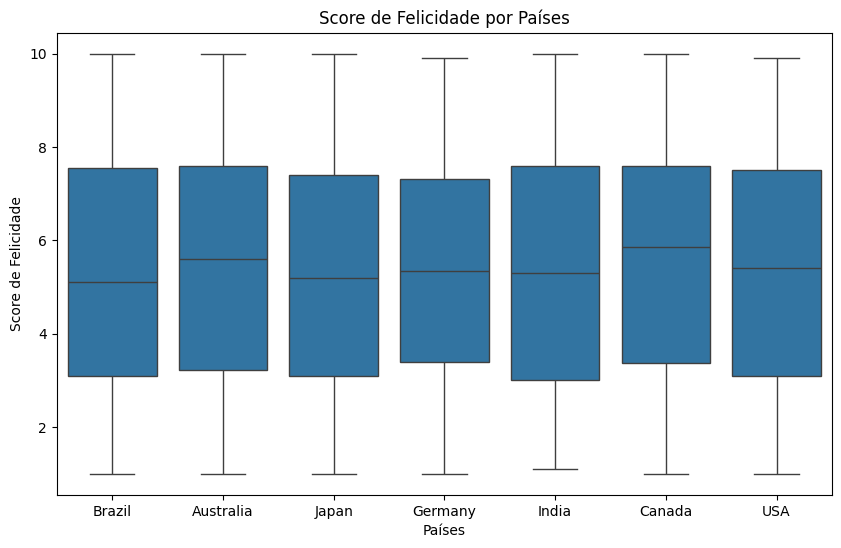

In [320]:
# # Boxplot Score de Felicidade por Países
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Happiness Score', data=df)
plt.title('Score de Felicidade por Países')
plt.xlabel('Países')
plt.ylabel('Score de Felicidade')
plt.show()

### *Gênero*


In [321]:
# Estatísticas descritivas agrupadas Gênero
df.groupby('Gender').describe()

Age                                                      \
         count       mean        std   min   25%   50%   75%   max   
Gender                                                               
Female  1024.0  40.769531  13.262137  18.0  29.0  40.0  52.0  64.0   
Male     980.0  41.550000  13.595294  18.0  30.0  42.0  53.0  64.0   
Other    996.0  41.387550  13.433791  18.0  30.0  41.0  53.0  64.0   

       Sleep Hours            ... Social Interaction Score        \
             count      mean  ...                      75%   max   
Gender                        ...                                  
Female      1024.0  6.521582  ...                      7.5  10.0   
Male         980.0  6.445918  ...                      7.7  10.0   
Other        996.0  6.458534  ...                      7.6  10.0   

       Happiness Score                                                  
                 count      mean       std  min  25%  50%    75%   max  
Gender                                                                  
Female          1024.0  5.287109  2.607559  1.0  3.0  5.3  7.525  10.0  
Male             980.0  5.474592  2.508310  1.0  3.4  5.5  7.500  10.0  
Other            996.0  5.427811  2.552559  1.0  3.2  5.5  7.500  10.0  

[3 rows x 48 columns]

Horas de Sono por Gênero

---



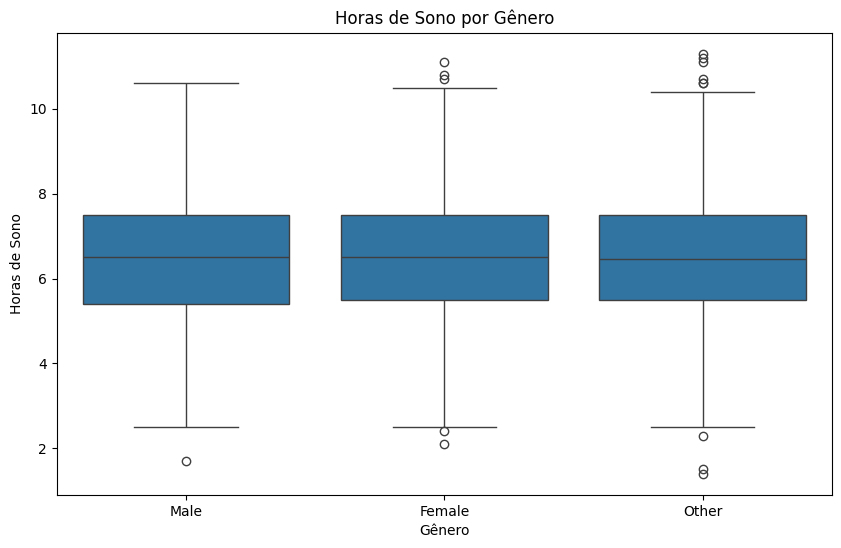

In [322]:
# Boxplot Horas de Sono por Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Sleep Hours', data=df)
plt.title('Horas de Sono por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Horas de Sono')
plt.show()

Idade por Gênero

---



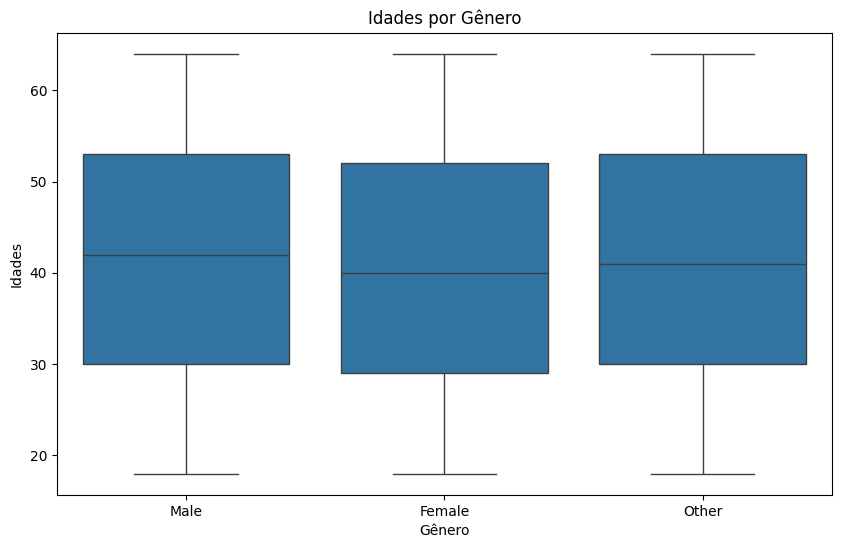

In [323]:
# Boxplot Idades por Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Idades por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idades')
plt.show()

Score de Felicidade por Gênero

---



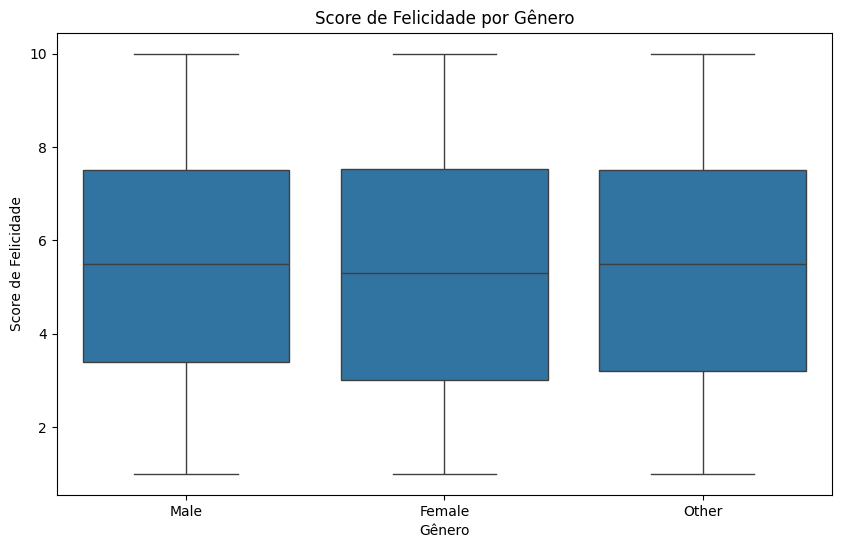

In [324]:
# # Boxplot Score de Felicidade por Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Happiness Score', data=df)
plt.title('Score de Felicidade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Score de Felicidade')
plt.show()

### *Nível de Exercício Físico*


In [325]:
# Estatísticas descritivas agrupadas Nível de Exercício Físico
df.groupby('Exercise Level').describe()

Age                                                      \
                 count       mean        std   min   25%   50%   75%   max   
Exercise Level                                                               
High             969.0  41.050568  13.618189  18.0  29.0  40.0  53.0  64.0   
Low             1033.0  40.877057  13.318380  18.0  30.0  40.0  52.0  64.0   
Moderate         998.0  41.768537  13.352768  18.0  30.0  42.0  53.0  64.0   

               Sleep Hours            ... Social Interaction Score        \
                     count      mean  ...                      75%   max   
Exercise Level                        ...                                  
High                 969.0  6.514448  ...                      7.7  10.0   
Low                 1033.0  6.459632  ...                      7.5  10.0   
Moderate             998.0  6.455411  ...                      7.7  10.0   

               Happiness Score                                                  
                         count      mean       std  min  25%  50%    75%   max  
Exercise Level                                                                  
High                     969.0  5.545408  2.612913  1.0  3.4  5.7  7.800  10.0  
Low                     1033.0  5.289545  2.514190  1.0  3.2  5.2  7.300  10.0  
Moderate                 998.0  5.358317  2.543583  1.0  3.1  5.4  7.575  10.0  

[3 rows x 48 columns]

Horas de Sono por Nível de Exercício Físico

---



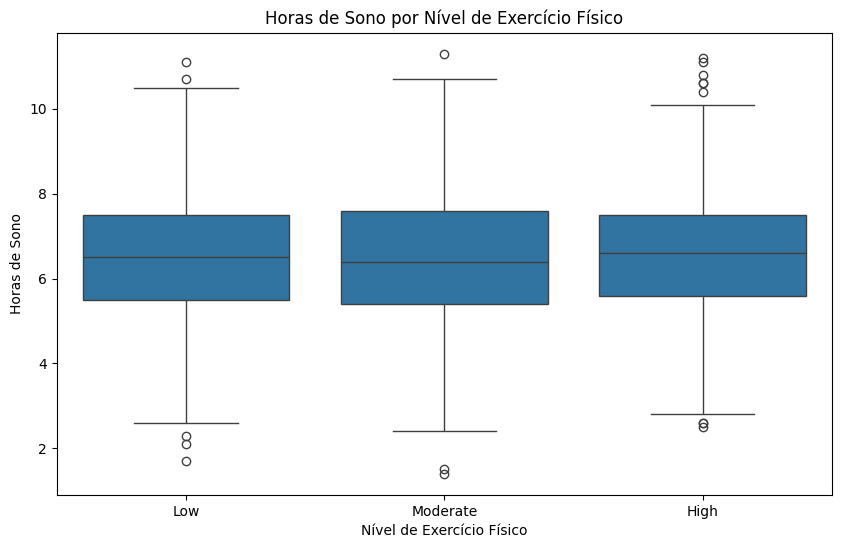

In [326]:
# Boxplot Horas de Sono por Nível de Exercício Físico
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise Level', y='Sleep Hours', data=df)
plt.title('Horas de Sono por Nível de Exercício Físico')
plt.xlabel('Nível de Exercício Físico')
plt.ylabel('Horas de Sono')
plt.show()

Idade por Nível de Exercício Físico

---



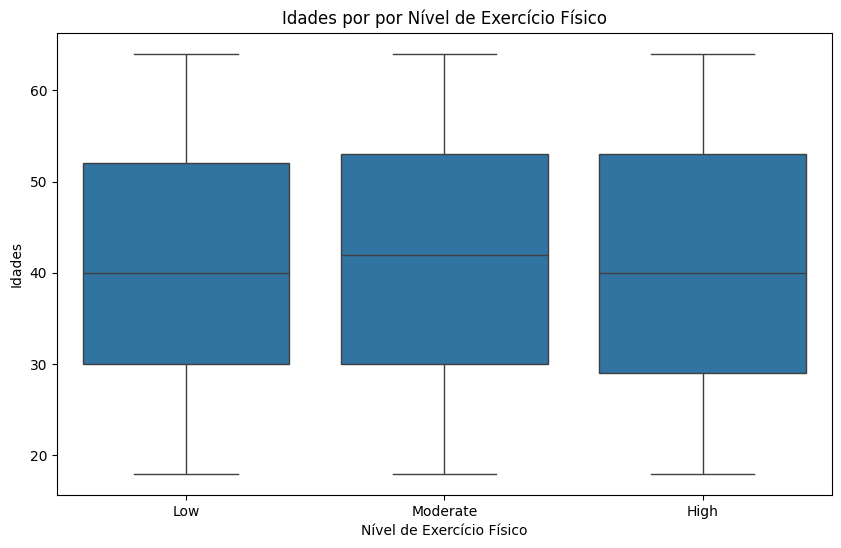

In [327]:
# Boxplot Idades por Nível de Exercício Físico
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise Level', y='Age', data=df)
plt.title('Idades por por Nível de Exercício Físico')
plt.xlabel('Nível de Exercício Físico')
plt.ylabel('Idades')
plt.show()

Score de Felicidade por Gênero

---



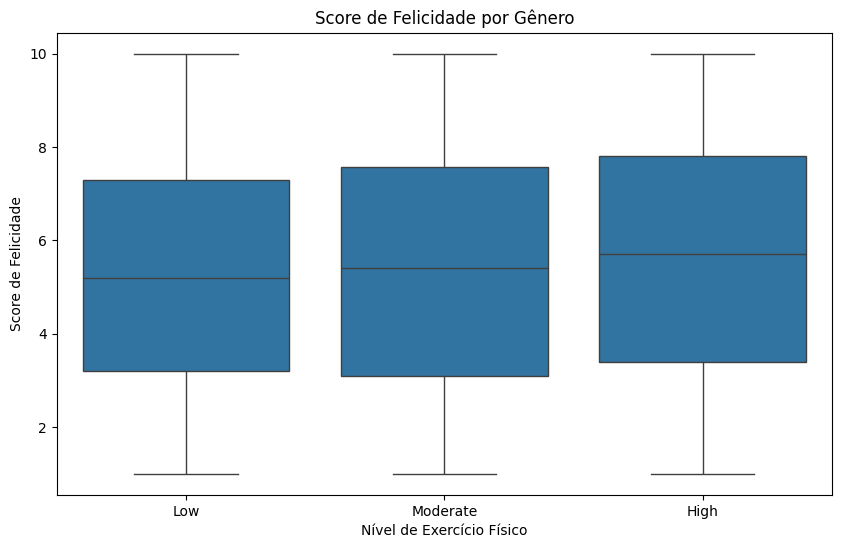

In [328]:
# # Boxplot Score de Felicidade por Nível de Exercício Físico
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise Level', y='Happiness Score', data=df)
plt.title('Score de Felicidade por Gênero')
plt.xlabel('Nível de Exercício Físico')
plt.ylabel('Score de Felicidade')
plt.show()

### *Tipo de Dieta*


In [329]:
# Estatísticas descritivas agrupadas Tipo de Dieta
df.groupby('Diet Type').describe()

Age                                                      \
            count       mean        std   min   25%   50%   75%   max   
Diet Type                                                               
Balanced    625.0  41.059200  13.442232  18.0  30.0  40.0  52.0  64.0   
Junk Food   637.0  41.733124  13.498231  18.0  30.0  42.0  53.0  64.0   
Keto        573.0  40.994764  12.954397  18.0  31.0  41.0  52.0  64.0   
Vegan       573.0  41.015707  13.798934  18.0  29.0  40.0  53.0  64.0   
Vegetarian  592.0  41.302365  13.455880  18.0  30.0  41.0  53.0  64.0   

           Sleep Hours            ... Social Interaction Score        \
                 count      mean  ...                      75%   max   
Diet Type                         ...                                  
Balanced         625.0  6.368640  ...                      7.6  10.0   
Junk Food        637.0  6.543014  ...                      7.6  10.0   
Keto             573.0  6.550436  ...                      7.7  10.0   
Vegan            573.0  6.455323  ...                      7.5  10.0   
Vegetarian       592.0  6.464865  ...                      7.8  10.0   

           Happiness Score                                                  
                     count      mean       std  min    25%  50%  75%   max  
Diet Type                                                                   
Balanced             625.0  5.247680  2.511914  1.0  3.100  5.2  7.3  10.0  
Junk Food            637.0  5.436264  2.550734  1.0  3.200  5.3  7.6  10.0  
Keto                 573.0  5.339616  2.561560  1.0  3.100  5.3  7.6  10.0  
Vegan                573.0  5.287086  2.573855  1.0  3.100  5.2  7.4  10.0  
Vegetarian           592.0  5.664527  2.579870  1.0  3.575  5.9  7.8  10.0  

[5 rows x 48 columns]

Horas de Sono por Tipo de Dieta

---



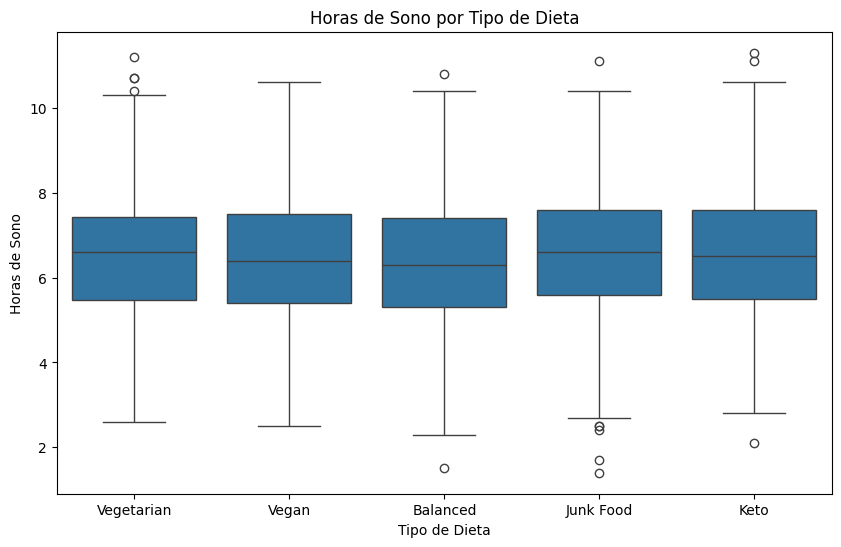

In [330]:
# Boxplot Horas de Sono por Tipo de Dieta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diet Type', y='Sleep Hours', data=df)
plt.title('Horas de Sono por Tipo de Dieta')
plt.xlabel('Tipo de Dieta')
plt.ylabel('Horas de Sono')
plt.show()

Idade por Tipo de Dieta

---



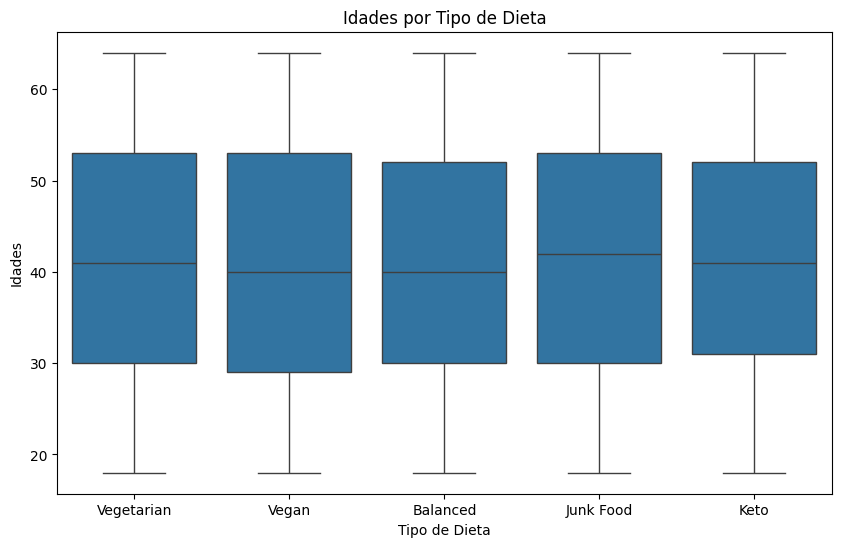

In [331]:
# Boxplot Idades por por Tipo de Dieta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diet Type', y='Age', data=df)
plt.title('Idades por Tipo de Dieta')
plt.xlabel('Tipo de Dieta')
plt.ylabel('Idades')
plt.show()

Score de Felicidade por Tipo de Dieta

---



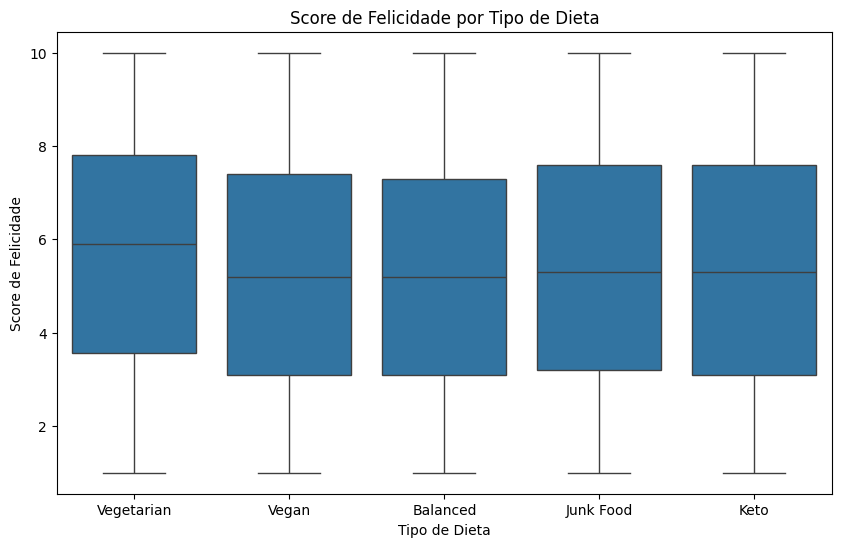

In [332]:
# # Boxplot Score de Felicidade por Tipo de Dieta
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diet Type', y='Happiness Score', data=df)
plt.title('Score de Felicidade por Tipo de Dieta')
plt.xlabel('Tipo de Dieta')
plt.ylabel('Score de Felicidade')
plt.show()

*Comentários Boxplot:*

* Primeiramente, foram apresentados os Boxplots dos atributos numéricos.

* Posteriormente, foram criados Boxplots individuais para que seja possível analisar determinado membro de uma variável categórica (Exemplo: Boxplot 'Horas de Sono de Cada País').

* Analisando os Boxplots individuais, podemos visualizar que, embora sejam visível alguns outliers, não há descolamentos entre os membros dos atributos selecionados (Exemplo: No Boxplot 'Horas de Sono de Cada País', podemos ver a sobreposição das caixas e o alinhamentos das medianas).


## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [333]:
# Matriz de correlação df
print("\nMatriz de Correlação:")
df.iloc[:,6:13].corr()


Matriz de Correlação:


Age  Sleep Hours  Work Hours per Week  \
Age                          1.000000    -0.016577            -0.000838   
Sleep Hours                 -0.016577     1.000000             0.011071   
Work Hours per Week         -0.000838     0.011071             1.000000   
Screen Time per Day (Hours) -0.004954     0.022550            -0.020283   
Social Interaction Score    -0.043870    -0.005222             0.015009   
Happiness Score             -0.015862     0.017389             0.010837   

                             Screen Time per Day (Hours)  \
Age                                            -0.004954   
Sleep Hours                                     0.022550   
Work Hours per Week                            -0.020283   
Screen Time per Day (Hours)                     1.000000   
Social Interaction Score                        0.006343   
Happiness Score                                 0.016790   

                             Social Interaction Score  Happiness Score  
Age                                         -0.043870        -0.015862  
Sleep Hours                                 -0.005222         0.017389  
Work Hours per Week                          0.015009         0.010837  
Screen Time per Day (Hours)                  0.006343         0.016790  
Social Interaction Score                     1.000000        -0.040236  
Happiness Score                             -0.040236         1.000000

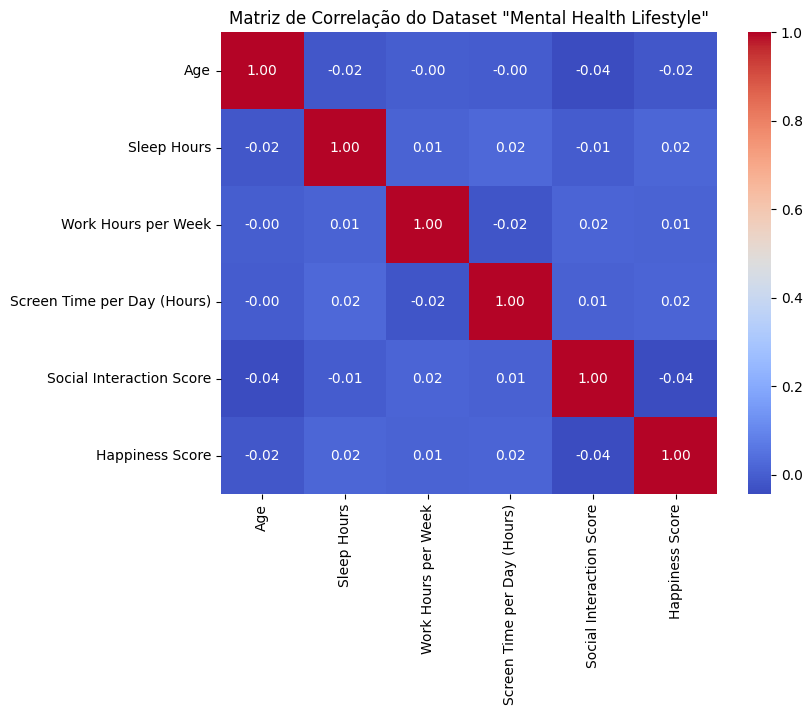

In [334]:
# mapa de calor das variáveis numéricas df
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:,6:13].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do Dataset "Mental Health Lifestyle"')
plt.show()

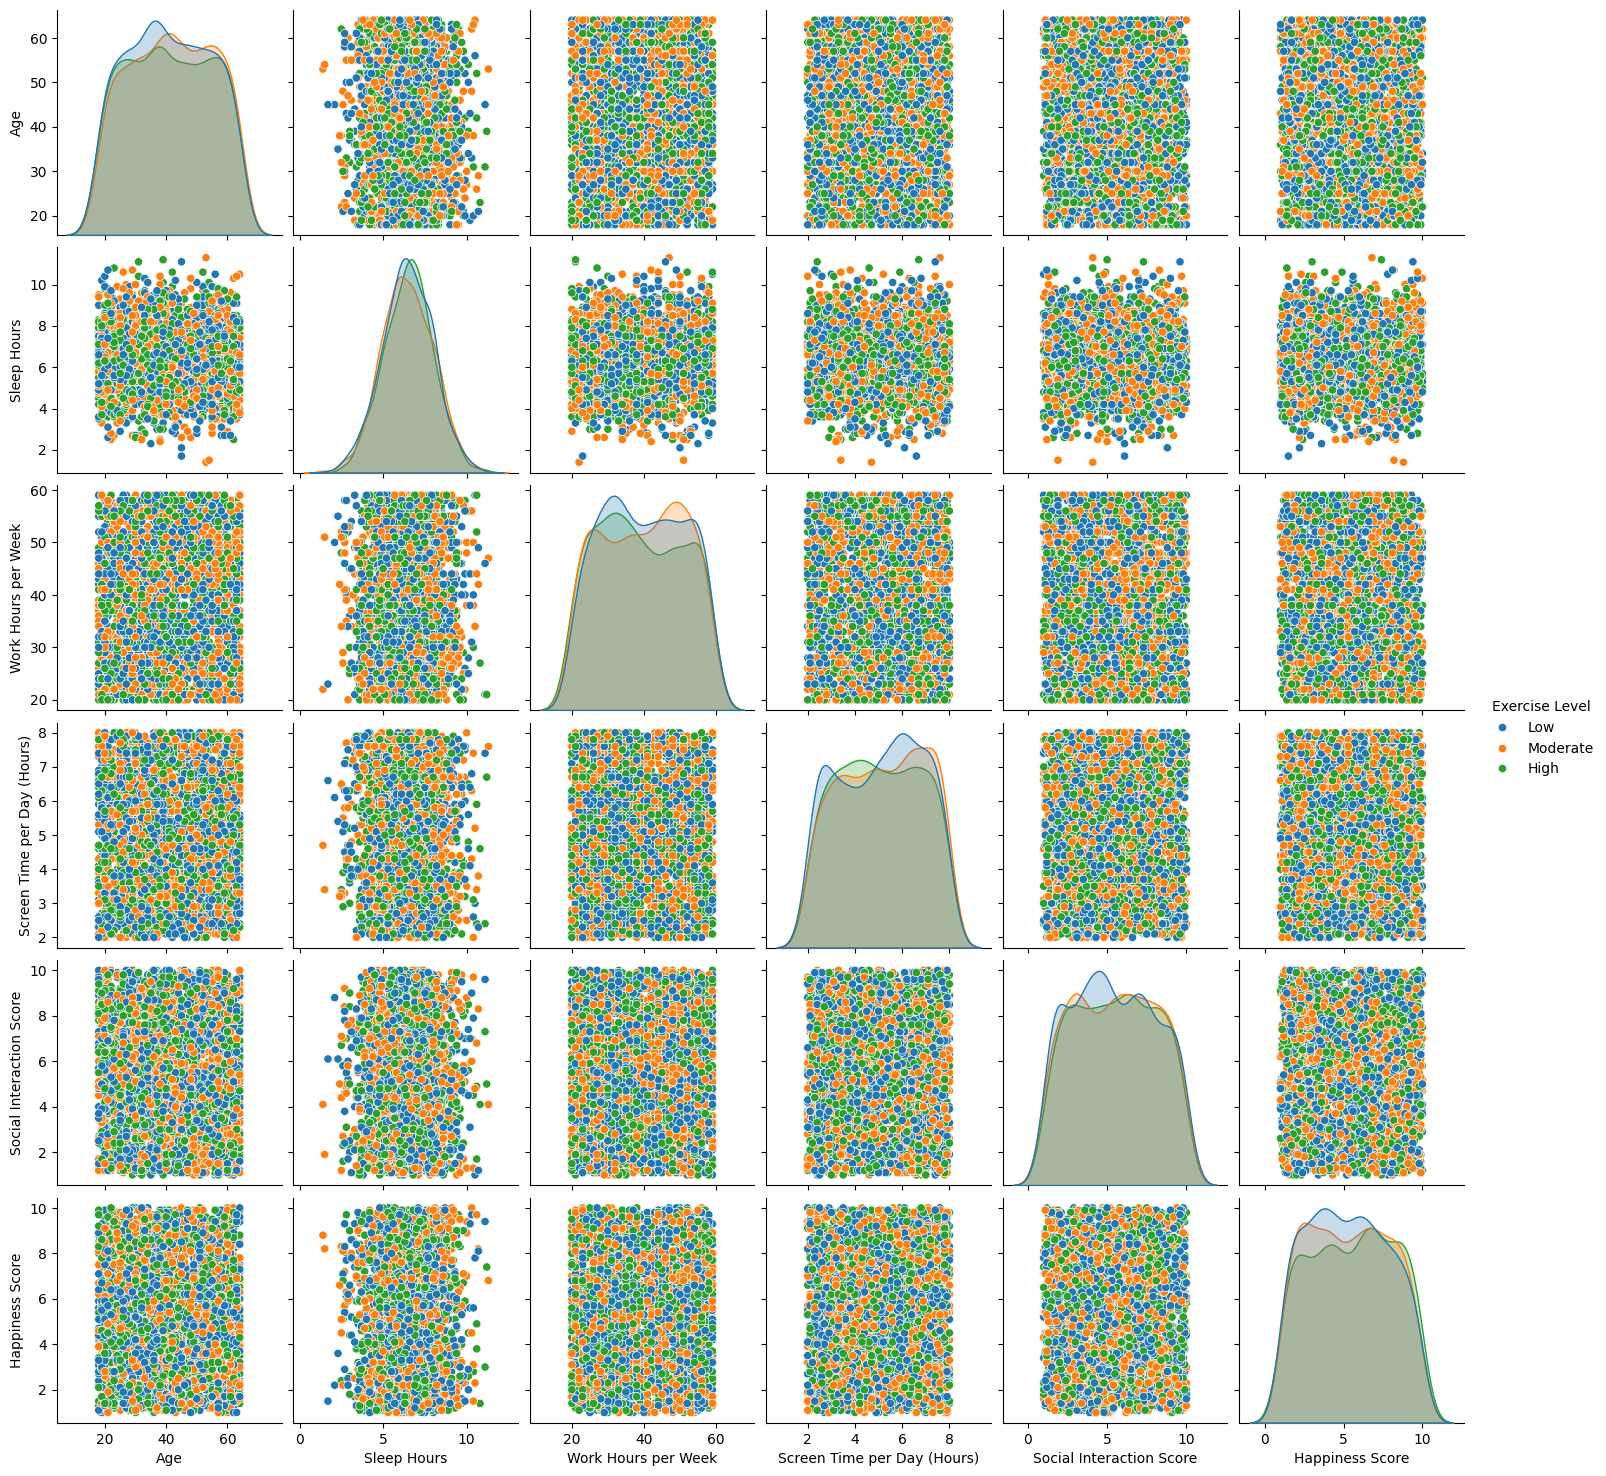

In [335]:
# pair plot 2 com Seaborn
sns.pairplot(df, hue = "Exercise Level");

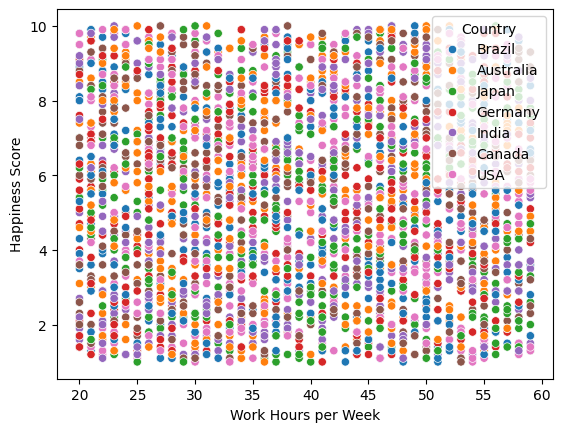

In [336]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='Work Hours per Week', y='Happiness Score', hue='Country', data=df);

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [164]:
# Separar features (X) e target (y)
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

In [165]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [166]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (2100, 11)
Dimensões de X_test: (900, 11)
Dimensões de y_train: (2100,)
Dimensões de y_test: (900,)


In [167]:
# Criação de um novo Dataframe (updated), incluindo os atributos normalizados

# recuperando os nomes das colunas
col = list(X_train.columns)

# o novo dataset irá conter todas as colunas do dataset original
df_updated = X_train[col[:]]

scaler = MinMaxScaler()

scaler = scaler.fit(df_updated[['Age']])
df_updated['Age_Norm'] = scaler.transform(df_updated[['Age']])

scaler = scaler.fit(df_updated[['Sleep Hours']])
df_updated['Sleep Hours_Norm'] = scaler.transform(df_updated[['Sleep Hours']])

scaler = scaler.fit(df_updated[['Work Hours per Week']])
df_updated['Work Hours per Week_Norm'] = scaler.transform(df_updated[['Work Hours per Week']])

scaler = scaler.fit(df_updated[['Screen Time per Day (Hours)']])
df_updated['Screen Time per Day (Hours)_Norm'] = scaler.transform(df_updated[['Screen Time per Day (Hours)']])

scaler = scaler.fit(df_updated[['Social Interaction Score']])
df_updated['Social Interaction Score_Norm'] = scaler.transform(df_updated[['Social Interaction Score']])

scaler = scaler.fit(df_updated[['Happiness Score']])
df_updated['Happiness Score_Norm'] = scaler.transform(df_updated[['Happiness Score']])

# removendo as colunas
df_updated.drop(['Age', 'Sleep Hours', 'Work Hours per Week','Screen Time per Day (Hours)','Social Interaction Score','Happiness Score'], axis=1, inplace= True)

In [168]:
# exibindo as primeiras linhas
df_updated.head()

Country  Gender Exercise Level  Diet Type Mental Health Condition  \
1562    Germany  Female            Low      Vegan                 Bipolar   
804   Australia  Female       Moderate  Junk Food              Depression   
137       India  Female           High      Vegan                     NaN   
1681      India   Other       Moderate   Balanced                 Anxiety   
13        Japan   Other            Low      Vegan                 Bipolar   

      Age_Norm  Sleep Hours_Norm  Work Hours per Week_Norm  \
1562  0.804348          0.285714                  0.153846   
804   0.608696          0.632653                  0.717949   
137   0.413043          0.500000                  0.076923   
1681  0.608696          0.306122                  0.769231   
13    0.086957          0.387755                  0.666667   

      Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
1562                          0.750000                       0.822222   
804                           0.466667                       0.166667   
137                           0.566667                       0.855556   
1681                          0.150000                       0.211111   
13                            0.183333                       0.888889   

      Happiness Score_Norm  
1562              0.255556  
804               0.377778  
137               0.200000  
1681              0.455556  
13                0.977778

In [169]:
# exibindo as primeiras linhas
df_updated.tail()

Country  Gender Exercise Level   Diet Type Mental Health Condition  \
257   Germany  Female            Low  Vegetarian                 Anxiety   
963     Japan  Female       Moderate   Junk Food                     NaN   
625       USA    Male           High        Keto                    PTSD   
1022  Germany   Other       Moderate        Keto                 Anxiety   
2238      USA  Female           High        Keto                 Anxiety   

      Age_Norm  Sleep Hours_Norm  Work Hours per Week_Norm  \
257   0.934783          0.193878                  0.128205   
963   0.434783          0.653061                  0.717949   
625   0.739130          0.663265                  0.820513   
1022  0.804348          0.479592                  0.153846   
2238  0.695652          0.704082                  0.974359   

      Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
257                           0.033333                       0.411111   
963                           0.900000                       0.644444   
625                           0.866667                       0.533333   
1022                          0.833333                       0.200000   
2238                          0.066667                       0.277778   

      Happiness Score_Norm  
257               0.033333  
963               0.633333  
625               0.644444  
1022              0.333333  
2238              0.633333

In [170]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df_updated.isnull().sum()

Valores nulos no dataset Iris:


Country                               0
Gender                                0
Exercise Level                        0
Diet Type                             0
Mental Health Condition             419
Age_Norm                              0
Sleep Hours_Norm                      0
Work Hours per Week_Norm              0
Screen Time per Day (Hours)_Norm      0
Social Interaction Score_Norm         0
Happiness Score_Norm                  0
dtype: int64

In [171]:
df_cleaned = df_updated.dropna(axis=1, how='any')

In [172]:
# exibindo as primeiras linhas
df_cleaned.head()

Country  Gender Exercise Level  Diet Type  Age_Norm  Sleep Hours_Norm  \
1562    Germany  Female            Low      Vegan  0.804348          0.285714   
804   Australia  Female       Moderate  Junk Food  0.608696          0.632653   
137       India  Female           High      Vegan  0.413043          0.500000   
1681      India   Other       Moderate   Balanced  0.608696          0.306122   
13        Japan   Other            Low      Vegan  0.086957          0.387755   

      Work Hours per Week_Norm  Screen Time per Day (Hours)_Norm  \
1562                  0.153846                          0.750000   
804                   0.717949                          0.466667   
137                   0.076923                          0.566667   
1681                  0.769231                          0.150000   
13                    0.666667                          0.183333   

      Social Interaction Score_Norm  Happiness Score_Norm  
1562                       0.822222              0.255556  
804                        0.166667              0.377778  
137                        0.855556              0.200000  
1681                       0.211111              0.455556  
13                         0.888889              0.977778

In [173]:
# exibindo as primeiras linhas
df_cleaned.tail()

Country  Gender Exercise Level   Diet Type  Age_Norm  Sleep Hours_Norm  \
257   Germany  Female            Low  Vegetarian  0.934783          0.193878   
963     Japan  Female       Moderate   Junk Food  0.434783          0.653061   
625       USA    Male           High        Keto  0.739130          0.663265   
1022  Germany   Other       Moderate        Keto  0.804348          0.479592   
2238      USA  Female           High        Keto  0.695652          0.704082   

      Work Hours per Week_Norm  Screen Time per Day (Hours)_Norm  \
257                   0.128205                          0.033333   
963                   0.717949                          0.900000   
625                   0.820513                          0.866667   
1022                  0.153846                          0.833333   
2238                  0.974359                          0.066667   

      Social Interaction Score_Norm  Happiness Score_Norm  
257                        0.411111              0.033333  
963                        0.644444              0.633333  
625                        0.533333              0.644444  
1022                       0.200000              0.333333  
2238                       0.277778              0.633333

In [174]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df_cleaned.isnull().sum()

Valores nulos no dataset Iris:


Country                             0
Gender                              0
Exercise Level                      0
Diet Type                           0
Age_Norm                            0
Sleep Hours_Norm                    0
Work Hours per Week_Norm            0
Screen Time per Day (Hours)_Norm    0
Social Interaction Score_Norm       0
Happiness Score_Norm                0
dtype: int64

In [176]:
df_cleaned = df_cleaned.reset_index()

In [177]:
# exibindo as primeiras linhas
df_cleaned.head()

index    Country  Gender Exercise Level  Diet Type  Age_Norm  \
0   1562    Germany  Female            Low      Vegan  0.804348   
1    804  Australia  Female       Moderate  Junk Food  0.608696   
2    137      India  Female           High      Vegan  0.413043   
3   1681      India   Other       Moderate   Balanced  0.608696   
4     13      Japan   Other            Low      Vegan  0.086957   

   Sleep Hours_Norm  Work Hours per Week_Norm  \
0          0.285714                  0.153846   
1          0.632653                  0.717949   
2          0.500000                  0.076923   
3          0.306122                  0.769231   
4          0.387755                  0.666667   

   Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
0                          0.750000                       0.822222   
1                          0.466667                       0.166667   
2                          0.566667                       0.855556   
3                          0.150000                       0.211111   
4                          0.183333                       0.888889   

   Happiness Score_Norm  
0              0.255556  
1              0.377778  
2              0.200000  
3              0.455556  
4              0.977778

In [178]:
# exibindo as primeiras linhas
df_cleaned.tail()

index  Country  Gender Exercise Level   Diet Type  Age_Norm  \
2095    257  Germany  Female            Low  Vegetarian  0.934783   
2096    963    Japan  Female       Moderate   Junk Food  0.434783   
2097    625      USA    Male           High        Keto  0.739130   
2098   1022  Germany   Other       Moderate        Keto  0.804348   
2099   2238      USA  Female           High        Keto  0.695652   

      Sleep Hours_Norm  Work Hours per Week_Norm  \
2095          0.193878                  0.128205   
2096          0.653061                  0.717949   
2097          0.663265                  0.820513   
2098          0.479592                  0.153846   
2099          0.704082                  0.974359   

      Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
2095                          0.033333                       0.411111   
2096                          0.900000                       0.644444   
2097                          0.866667                       0.533333   
2098                          0.833333                       0.200000   
2099                          0.066667                       0.277778   

      Happiness Score_Norm  
2095              0.033333  
2096              0.633333  
2097              0.644444  
2098              0.333333  
2099              0.633333

In [179]:
print(f"Total de instâncias: {len(df_cleaned)}")
print("\nTipos de dados por coluna:")
print(df_cleaned.info())

Total de instâncias: 2100

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             2100 non-null   int64  
 1   Country                           2100 non-null   object 
 2   Gender                            2100 non-null   object 
 3   Exercise Level                    2100 non-null   object 
 4   Diet Type                         2100 non-null   object 
 5   Age_Norm                          2100 non-null   float64
 6   Sleep Hours_Norm                  2100 non-null   float64
 7   Work Hours per Week_Norm          2100 non-null   float64
 8   Screen Time per Day (Hours)_Norm  2100 non-null   float64
 9   Social Interaction Score_Norm     2100 non-null   float64
 10  Happiness Score_Norm              2100 non-null   float64
dtypes: float64(6), 

In [180]:
df_OneHotEnconder_test = OneHotEncoder(sparse_output=False).fit_transform(df_cleaned[['Country','Gender','Exercise Level','Diet Type']])

# exibindo os dados transformados
print("Atributos transformados:")
print(df_OneHotEnconder_test[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]]


In [185]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_cleaned[['Country','Gender','Exercise Level','Diet Type']])

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Country','Gender','Exercise Level','Diet Type']))

df_final = pd.concat([df_cleaned, df_encoded], axis=1)

# removendo as colunas
df_final.drop(['index','Country','Gender','Exercise Level','Diet Type'], axis=1, inplace= True)

print(df_final)

      Age_Norm  Sleep Hours_Norm  Work Hours per Week_Norm  \
0     0.804348          0.285714                  0.153846   
1     0.608696          0.632653                  0.717949   
2     0.413043          0.500000                  0.076923   
3     0.608696          0.306122                  0.769231   
4     0.086957          0.387755                  0.666667   
...        ...               ...                       ...   
2095  0.934783          0.193878                  0.128205   
2096  0.434783          0.653061                  0.717949   
2097  0.739130          0.663265                  0.820513   
2098  0.804348          0.479592                  0.153846   
2099  0.695652          0.704082                  0.974359   

      Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
0                             0.750000                       0.822222   
1                             0.466667                       0.166667   
2                             0.5666

In [188]:
# exibindo as primeiras linhas
df_final.head()

Age_Norm  Sleep Hours_Norm  Work Hours per Week_Norm  \
0  0.804348          0.285714                  0.153846   
1  0.608696          0.632653                  0.717949   
2  0.413043          0.500000                  0.076923   
3  0.608696          0.306122                  0.769231   
4  0.086957          0.387755                  0.666667   

   Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
0                          0.750000                       0.822222   
1                          0.466667                       0.166667   
2                          0.566667                       0.855556   
3                          0.150000                       0.211111   
4                          0.183333                       0.888889   

   Happiness Score_Norm  Country_Australia  Country_Brazil  Country_Canada  \
0              0.255556                0.0             0.0             0.0   
1              0.377778                1.0             0.0             0.0   
2              0.200000                0.0             0.0             0.0   
3              0.455556                0.0             0.0             0.0   
4              0.977778                0.0             0.0             0.0   

   Country_Germany  ...  Gender_Male  Gender_Other  Exercise Level_High  \
0              1.0  ...          0.0           0.0                  0.0   
1              0.0  ...          0.0           0.0                  0.0   
2              0.0  ...          0.0           0.0                  1.0   
3              0.0  ...          0.0           1.0                  0.0   
4              0.0  ...          0.0           1.0                  0.0   

   Exercise Level_Low  Exercise Level_Moderate  Diet Type_Balanced  \
0                 1.0                      0.0                 0.0   
1                 0.0                      1.0                 0.0   
2                 0.0                      0.0                 0.0   
3                 0.0                      1.0                 1.0   
4                 1.0                      0.0                 0.0   

   Diet Type_Junk Food  Diet Type_Keto  Diet Type_Vegan  Diet Type_Vegetarian  
0                  0.0             0.0              1.0                   0.0  
1                  1.0             0.0              0.0                   0.0  
2                  0.0             0.0              1.0                   0.0  
3                  0.0             0.0              0.0                   0.0  
4                  0.0             0.0              1.0                   0.0  

[5 rows x 24 columns]

In [189]:
# exibindo as primeiras linhas
df_final.tail()

Age_Norm  Sleep Hours_Norm  Work Hours per Week_Norm  \
2095  0.934783          0.193878                  0.128205   
2096  0.434783          0.653061                  0.717949   
2097  0.739130          0.663265                  0.820513   
2098  0.804348          0.479592                  0.153846   
2099  0.695652          0.704082                  0.974359   

      Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
2095                          0.033333                       0.411111   
2096                          0.900000                       0.644444   
2097                          0.866667                       0.533333   
2098                          0.833333                       0.200000   
2099                          0.066667                       0.277778   

      Happiness Score_Norm  Country_Australia  Country_Brazil  Country_Canada  \
2095              0.033333                0.0             0.0             0.0   
2096              0.633333                0.0             0.0             0.0   
2097              0.644444                0.0             0.0             0.0   
2098              0.333333                0.0             0.0             0.0   
2099              0.633333                0.0             0.0             0.0   

      Country_Germany  ...  Gender_Male  Gender_Other  Exercise Level_High  \
2095              1.0  ...          0.0           0.0                  0.0   
2096              0.0  ...          0.0           0.0                  0.0   
2097              0.0  ...          1.0           0.0                  1.0   
2098              1.0  ...          0.0           1.0                  0.0   
2099              0.0  ...          0.0           0.0                  1.0   

      Exercise Level_Low  Exercise Level_Moderate  Diet Type_Balanced  \
2095                 1.0                      0.0                 0.0   
2096                 0.0                      1.0                 0.0   
2097                 0.0                      0.0                 0.0   
2098                 0.0                      1.0                 0.0   
2099                 0.0                      0.0                 0.0   

      Diet Type_Junk Food  Diet Type_Keto  Diet Type_Vegan  \
2095                  0.0             0.0              0.0   
2096                  1.0             0.0              0.0   
2097                  0.0             1.0              0.0   
2098                  0.0             1.0              0.0   
2099                  0.0             1.0              0.0   

      Diet Type_Vegetarian  
2095                   1.0  
2096                   0.0  
2097                   0.0  
2098                   0.0  
2099                   0.0  

[5 rows x 24 columns]

In [190]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df_final.corr()


Matriz de Correlação:


Age_Norm  Sleep Hours_Norm  \
Age_Norm                          1.000000         -0.027304   
Sleep Hours_Norm                 -0.027304          1.000000   
Work Hours per Week_Norm         -0.012664          0.025410   
Screen Time per Day (Hours)_Norm -0.007661          0.028033   
Social Interaction Score_Norm    -0.062108          0.002373   
Happiness Score_Norm             -0.022151          0.026869   
Country_Australia                -0.002522         -0.022110   
Country_Brazil                   -0.000264         -0.005960   
Country_Canada                   -0.029761          0.023503   
Country_Germany                  -0.007431         -0.027486   
Country_India                     0.011753          0.002016   
Country_Japan                     0.013989          0.017419   
Country_USA                       0.014084          0.012193   
Gender_Female                    -0.032190         -0.003871   
Gender_Male                       0.037337          0.000514   
Gender_Other                     -0.004799          0.003348   
Exercise Level_High               0.000962         -0.000653   
Exercise Level_Low               -0.013254         -0.005493   
Exercise Level_Moderate           0.012541          0.006231   
Diet Type_Balanced               -0.001853         -0.041630   
Diet Type_Junk Food               0.006145          0.031600   
Diet Type_Keto                   -0.003707          0.008349   
Diet Type_Vegan                  -0.001403         -0.021574   
Diet Type_Vegetarian              0.000625          0.022322   

                                  Work Hours per Week_Norm  \
Age_Norm                                         -0.012664   
Sleep Hours_Norm                                  0.025410   
Work Hours per Week_Norm                          1.000000   
Screen Time per Day (Hours)_Norm                 -0.000176   
Social Interaction Score_Norm                     0.004289   
Happiness Score_Norm                              0.007486   
Country_Australia                                -0.014643   
Country_Brazil                                   -0.005635   
Country_Canada                                   -0.001856   
Country_Germany                                  -0.024355   
Country_India                                     0.019403   
Country_Japan                                     0.007131   
Country_USA                                       0.019610   
Gender_Female                                    -0.013840   
Gender_Male                                       0.017031   
Gender_Other                                     -0.003028   
Exercise Level_High                              -0.045292   
Exercise Level_Low                                0.013438   
Exercise Level_Moderate                           0.030848   
Diet Type_Balanced                               -0.000500   
Diet Type_Junk Food                               0.015724   
Diet Type_Keto                                    0.007419   
Diet Type_Vegan                                  -0.012686   
Diet Type_Vegetarian                             -0.010463   

                                  Screen Time per Day (Hours)_Norm  \
Age_Norm                                                 -0.007661   
Sleep Hours_Norm                                          0.028033   
Work Hours per Week_Norm                                 -0.000176   
Screen Time per Day (Hours)_Norm                          1.000000   
Social Interaction Score_Norm                             0.007588   
Happiness Score_Norm                                      0.026434   
Country_Australia                                         0.018499   
Country_Brazil                                            0.009557   
Country_Canada                                            0.033930   
Country_Germany                                          -0.026825   
Country_India                                            -0.052562   
Country_Japan                             

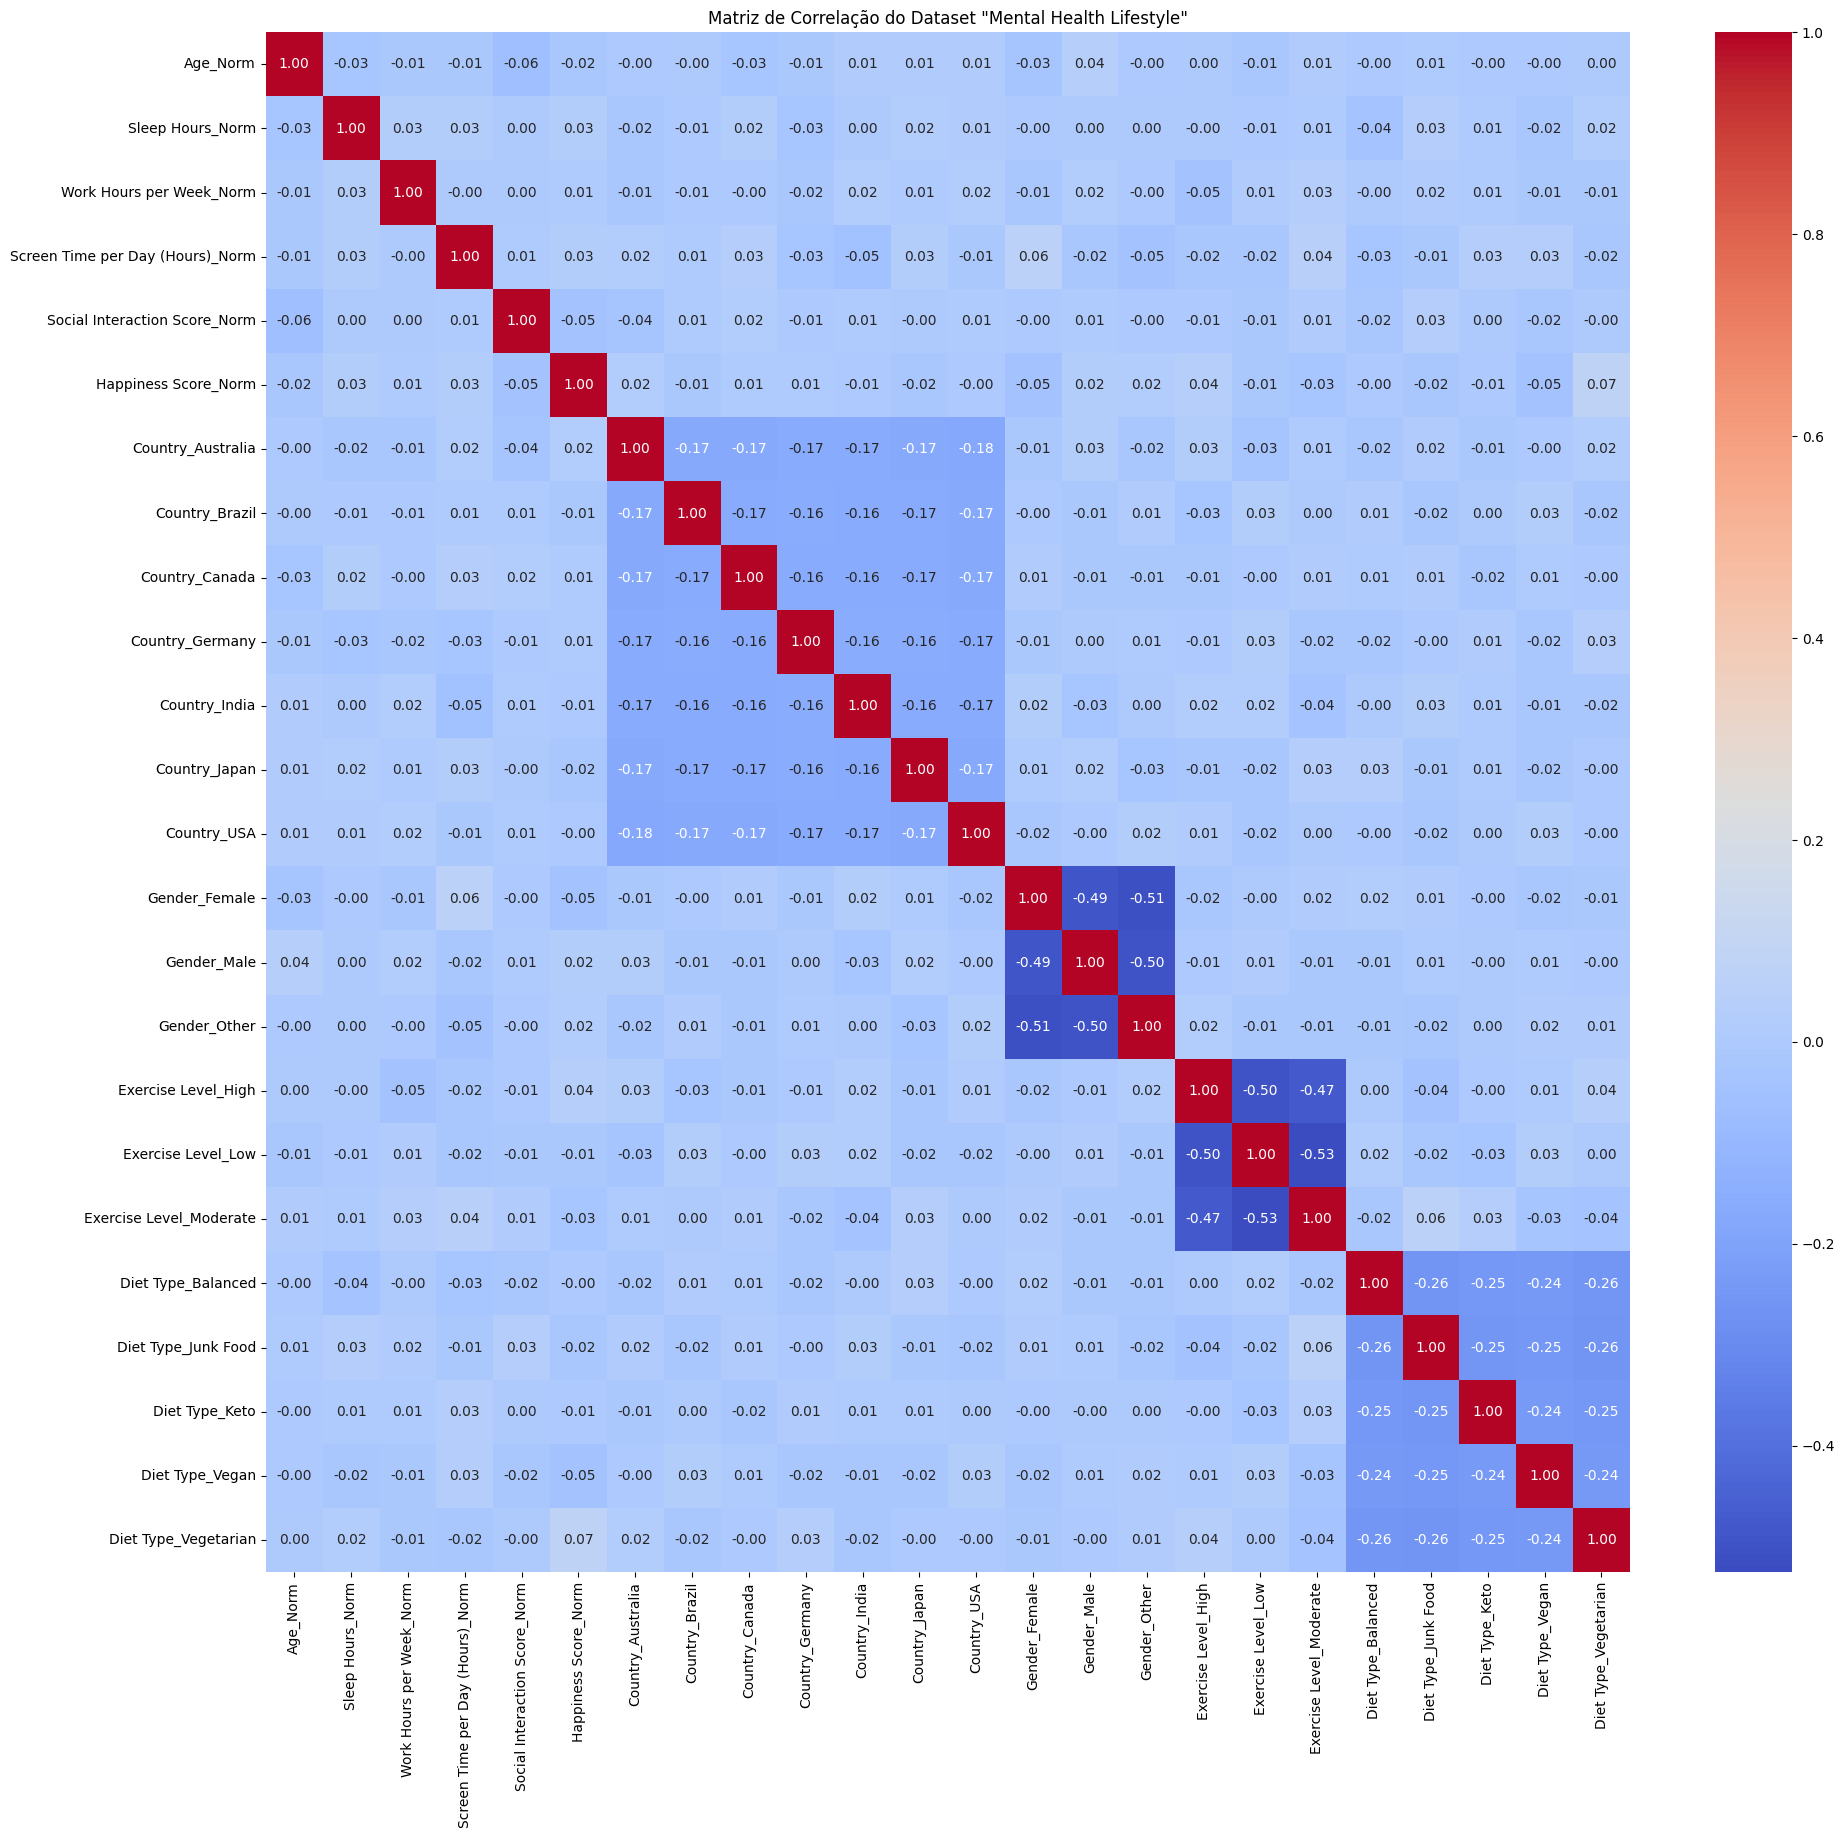

In [191]:
plt.figure(figsize=(22, 20))
# mapa de calor das variáveis numéricas
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do Dataset "Mental Health Lifestyle"')
plt.show()